# Kaggle Housing Price Prediction

This notebook walks through building a machine learning model to predict
housing prices from the Kaggle Advanced Regression Techniques competition:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

In [2]:
# Load training and testing data
train = pd.read_csv('data/kaggle/train.csv')
test  = pd.read_csv('data/kaggle/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In this section we will explore the data, deal with missing values
and prep the data for training with our model.

<AxesSubplot:>

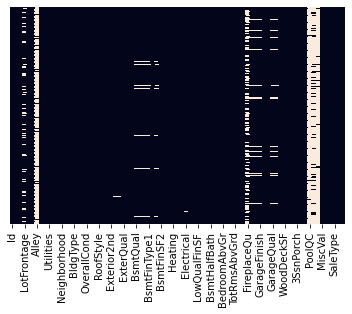

In [4]:
# Check heatmap of null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [5]:
# Drop variables with more than 50% null values
to_drop = []
for col in train.columns:
    if train[col].isnull().sum()/len(train) > 0.5:
        print('Dropping %s Column' % col)
        to_drop.append(col)

# Drop Id column as well
to_drop.append('Id')
        
# Drop from both training and testing data
train = train.drop(to_drop,axis=1)
test  = test.drop(to_drop,axis=1)

Dropping Alley Column
Dropping PoolQC Column
Dropping Fence Column
Dropping MiscFeature Column


In [6]:
# Fill in missing values for remaining variables
for col in train.columns:
    if train[col].isnull().sum()>0:
        print('Need to fill values for %s' % col)

Need to fill values for LotFrontage
Need to fill values for MasVnrType
Need to fill values for MasVnrArea
Need to fill values for BsmtQual
Need to fill values for BsmtCond
Need to fill values for BsmtExposure
Need to fill values for BsmtFinType1
Need to fill values for BsmtFinType2
Need to fill values for Electrical
Need to fill values for FireplaceQu
Need to fill values for GarageType
Need to fill values for GarageYrBlt
Need to fill values for GarageFinish
Need to fill values for GarageQual
Need to fill values for GarageCond


In [7]:
train['LotFrontage']  = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrType']   = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']   = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['BsmtCond']     = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']     = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical']   = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['FireplaceQu']  = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']   = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']   = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']   = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageYrBlt']  = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

Now we have to perform the same process on the test data. Fill all missing 
values with mean or mode of the given variable.

In [8]:
# Fill in missing values for test data
for col in test.columns:
    if test[col].isnull().sum()>0:
        print('Need to fill values for %s' % col)    

Need to fill values for MSZoning
Need to fill values for LotFrontage
Need to fill values for Utilities
Need to fill values for Exterior1st
Need to fill values for Exterior2nd
Need to fill values for MasVnrType
Need to fill values for MasVnrArea
Need to fill values for BsmtQual
Need to fill values for BsmtCond
Need to fill values for BsmtExposure
Need to fill values for BsmtFinType1
Need to fill values for BsmtFinSF1
Need to fill values for BsmtFinType2
Need to fill values for BsmtFinSF2
Need to fill values for BsmtUnfSF
Need to fill values for TotalBsmtSF
Need to fill values for BsmtFullBath
Need to fill values for BsmtHalfBath
Need to fill values for KitchenQual
Need to fill values for Functional
Need to fill values for FireplaceQu
Need to fill values for GarageType
Need to fill values for GarageYrBlt
Need to fill values for GarageFinish
Need to fill values for GarageCars
Need to fill values for GarageArea
Need to fill values for GarageQual
Need to fill values for GarageCond
Need to f

In [9]:
test['MSZoning']     = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['LotFrontage']  = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['Utilities']    = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']  = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']  = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType']   = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']   = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['BsmtCond']     = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']     = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtFinSF1']   = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']   = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']    = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']  = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']  = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']   = test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']   = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']   = test['GarageArea'].fillna(test['GarageArea'].mean())
test['GarageYrBlt']   = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['SaleType']     = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Electrical']   = test['Electrical'].fillna(test['Electrical'].mode()[0])
test['FireplaceQu']  = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']   = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']   = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']   = test['GarageCond'].fillna(test['GarageCond'].mode()[0])

We have successfully filled all none values and dropped variables which we
won't be needing for our model (variables with more than 50% null value rate)

Now we need to one hot encode our categorical variables to make them compatible
with machine learning models.

Note that we want to combine our training and testing data before we do this to make
sure that our one hot encoding takes into account all classes between both the testing 
and training data.

In [10]:
def onehot_encode(df,columns):
    r''' One hot encode all categorical variables in the 
        given dataframe. 
    
    Parameters:
    -----------
    df: pd dataframe
        Pandas Dataframe containing data
    columns: list
        List of columns to one hot encode
    '''
    
    for col in columns:
        dummy = pd.get_dummies(df[col],drop_first=True)
        
        df.drop([col],axis=1,inplace=True)
        df = pd.concat([df,dummy],axis=1)
    
    return df

In [11]:
# Combine training and testing data. Keep track of size of training
# data when we want to split them again
train_size = len(train)
full_data = pd.concat([train,test],axis=0)
print(full_data.shape)

# # Find all categorical columns and one hot encode them
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
         'LandSlope','Neighborhood','Condition2','BldgType','Condition1','HouseStyle',
         'SaleType','SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual',
         'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl',
         'Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC','CentralAir',
         'Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
         'GarageFinish','GarageQual','GarageCond','PavedDrive']

full_data = onehot_encode(full_data,columns)


(2919, 76)


In [12]:
# The one hot encoding function will create duplicate columns
# so the following line of code will get rid of the duplicates
print(full_data.shape)
full_data = full_data.loc[:,~full_data.columns.duplicated()]
print(full_data.shape)

(2919, 237)
(2919, 177)


## Build and Train Models

In this section we will select several models and train them on the
testing data set.

In [13]:
from sklearn.ensemble      import RandomForestRegressor
from sklearn               import metrics

In [15]:
# Remake training and testing data
train = full_data[:train_size]
test  = full_data[train_size:]

# Split training data into features and labels
x_train = train.drop(['SalePrice'],axis=1)
y_train = train['SalePrice']

In [16]:
regressor = RandomForestRegressor(n_estimators=500)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [17]:
y_pred = regressor.predict(x_train)

In [18]:
rmse = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
print('Root mean squared error on training set: %.3f' % rmse)

Root mean squared error on training set: 10774.873


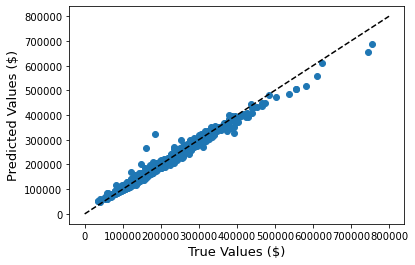

In [19]:
# Plot the results of the training set
plt.scatter(y_train,y_pred)
plt.plot(np.linspace(0,800000,100),np.linspace(0,800000,100),color='k',linestyle='--')
plt.xlabel('True Values ($)',fontsize=13)
plt.ylabel('Predicted Values ($)',fontsize=13)
plt.show()
